In [1]:
from collections import Counter

import sys
sys.path.insert(0, "..")
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd
from imblearn.combine import SMOTETomek
from beartype import beartype
from beartype.typing import Tuple
from eis_toolkit.exceptions import EmptyDataFrameException

LABELS = ["No Mineral", "Mineral"]

In [2]:
def load_data(path1: str, path2: str) -> pd.DataFrame:
    """
    Load two csv files from specified paths and concatenate them by rows.

    - param path1 (str): Path to the GT.
    - param path2 (str): Path to the other data
    Return:
    - dataframe: A concatenated dataframe combining rows from both CSV files
    """

    df0 = pd.read_csv(path1)  # load a dataframe from the csv file located at path1
    df1 = pd.read_csv(path2)  # load a dataframe from the csv file located at path2
    return pd.concat([df1, df0])  # concatenate and return the concatenated dataframe


In [3]:
def drop_columns(df: pd.DataFrame, columns_to_drop: list) -> pd.DataFrame:
    """
    Drop specified columns from a dataframe.

    This function takes in a dataframe and a list of column names, and returns
    a new dataframe without those columns.

    Parameters:
    - df (pandas.DataFrame): The original dataframe from which columns need to be dropped.
    - columns_to_drop (list): A list of column names to drop from the dataframe.

    Returns:
    - dataframe: A new dataframe with specified columns removed.
    """

    return df.drop(columns_to_drop, axis=1)

In [4]:
def plot_data_distribution(df: pd.DataFrame) -> None:
    """
    Plot the distribution of the 'class' column from a dataframe.

    This function takes in a dataframe and visualizes the distribution
    of the 'class' column in a bar chart format. It assumes there are
    two unique values in the 'class' column and labels them using the
    global variable LABELS.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the 'class' column
                             whose distribution needs to be visualized.

    Returns:
    - None: Displays a bar chart of the class distribution.

    """

    count_classes = pd.value_counts(df["class"], sort=True)
    count_classes.plot(kind="bar", rot=0)
    plt.title("Data Class Distribution")
    plt.xticks(range(2), LABELS)
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.show()

In [5]:
def data_info(df: pd.DataFrame) -> None:
    """
    Display the shape information of 'Mineral' and 'No_mineral' classes from a dataframe.

    This function takes in a dataframe and prints out the shape (number of rows and columns)
    of entries classified as 'Mineral' (class=1) and 'No_mineral' (class=0) based on the 'class' column.

    Parameters:
    - df (pandas.DataFrame): The dataframe containing the 'class' column,
                             which differentiates between 'Mineral' and 'No_mineral'.

    Returns:
    - None: Prints out the shape information for both classes.
    """

    Mineral = df[df["class"] == 1]
    No_mineral = df[df["class"] == 0]
    print(f"Mineral.shape--->{Mineral.shape}  No_mineral--->{No_mineral.shape}")



In [6]:
def smote_tomek(features: pd.DataFrame, target_label: pd.Series) -> Tuple[pd.DataFrame, pd.Series]:
    """
    Balance the dataset using SMOTETomek resampling method.
    This function receives features `X` and target labels `y` as inputs and balance 
    the dataset using the SMOTETomek resampling technique. After resampling, it prints
    the shape of the original and the resampled dataset. It's particularly useful for
    addressing class imbalance problems.

    Parameters:
        X (pandas.DataFrame or pandas.Series): The feature matrix.
        y (pandas.Series): The target labels corresponding to the feature matrix.

    Returns:
        tuple: Resampled feature matrix and target labels (X_res, y_res).

 
    """
    if features is None or features.empty:
        raise EmptyDataFrameException
    smk = SMOTETomek(random_state=42)
    X_res, y_res = smk.fit_resample(features, target_label)
    return X_res, y_res


X.shape--->(1843581, 20) and y.shape--->(1843581,)


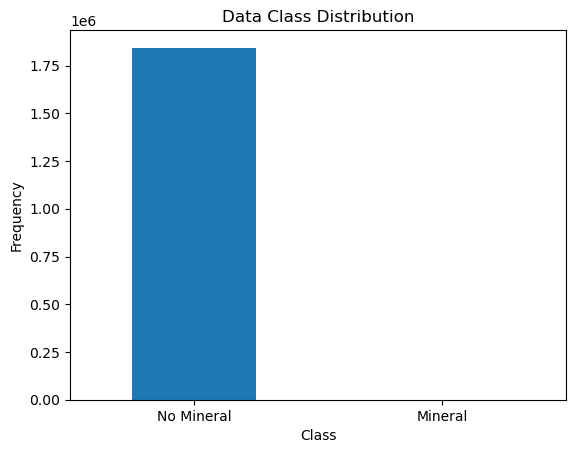

Mineral.shape--->(17, 21)  No_mineral--->(1843564, 21)


In [7]:
# defining the paths for two csv data files
path1 = "/home/dipak/Desktop/Final_EIS_Data/2M_raster_points.csv"
path2 = "/home/dipak/Desktop/Final_EIS_Data/17_annoted_points.csv"

data_frame = load_data(path1, path2)
data_frame = drop_columns(data_frame, ["E", "N"])

# Define data as X and class as y
X = data_frame.drop("class", axis=1)
y = data_frame["class"]
print(f"X.shape--->{X.shape} and y.shape--->{y.shape}")

# plotting the data_distribution
plot_data_distribution(data_frame)

# calling the data_info function
data_info(data_frame)

# calling the function balance_data to address the issue for class imbalance
X_SMOTET_balance, y_SMOTET_balance = smote_tomek(X, y)

In [ ]:
# Define data as X and class as y
X_SMOTET_balance = data_frame.drop("class", axis=1)
y_SMOTET_balance = data_frame["class"]
print(f"X.shape--->{X_SMOTET_balance.shape} and y.shape--->{y_SMOTET_balance.shape}")